In [2]:
from rouge import Rouge
import pandas as pd
from pathlib import Path
import json


In [38]:
RAWDATAFILES = {
    "train": "training_complete.jsonl",
    "val": "validation_complete.jsonl",
    "test": "testing_with_paper_release.jsonl"
}

def load_ref(filepath):
    with open(filepath, 'r') as json_file:
        json_list = list(json_file)
    dataset = []
    data_len = len(json_list)
    for i, json_str in enumerate(json_list):
        result = json.loads(json_str)
        dataset.append({
            "paper_id": result["paper_id"], 
            "ref_sum": result["summary"]
        })
    return pd.DataFrame(dataset)

def load_val_sum(dataset="val", section="summary", inputType="kg"):
    result_file = f"record_result/generated_summary/val_{section}_{inputType}.csv"
    print(f"Loading result from {result_file}")
    gen = pd.read_csv(result_file, index_col=0)
    filepath = str((Path().absolute()).parents[0])+"/dataset_MuP/"+RAWDATAFILES['val']
    ref = load_ref(filepath)
    return pd.merge(gen, ref, on='paper_id', how='outer')

In [39]:
generated_sum = load_val_sum()
# generated_sum.drop_duplicates()
generated_sum

Loading result from record_result/generated_summary/val_summary_kg.csv


,paper_id,input,output_bestRouge1,output_bestRougeAvg,ref_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,local differential privacy constraints FEATURE...,This paper studies the problem of local differ...,This paper studies the problem of local differ...,This paper studies FL under local differential...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,local differential privacy constraints FEATURE...,This paper studies the problem of local differ...,This paper studies the problem of local differ...,This paper studies a low communication algorit...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,local differential privacy constraints FEATURE...,This paper studies the problem of local differ...,This paper studies the problem of local differ...,The paper proposed a differentially private tr...
3,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,low communication algorithm USED-FOR multivari...,This paper proposes a low communication algori...,This paper proposes a low communication algori...,This paper studies FL under local differential...
4,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,low communication algorithm USED-FOR multivari...,This paper proposes a low communication algori...,This paper proposes a low communication algori...,This paper studies a low communication algorit...
...,...,...,...,...,...
13099,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,non - Euclidean spaces USED-FOR GCNs. embeddin...,This paper considers the problem of learning G...,This paper considers the problem of learning G...,The authors propose using non-Euclidean spaces...
13100,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,non - Euclidean spaces USED-FOR GCNs. embeddin...,This paper considers the problem of learning G...,This paper considers the problem of learning G...,"In this paper, the authors address representat..."
13101,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,non - Euclidean spaces USED-FOR representation...,This paper studies the problem of representati...,This paper studies the problem of representati...,This paper builds a new graph convolutional ne...
13102,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,non - Euclidean spaces USED-FOR representation...,This paper studies the problem of representati...,This paper studies the problem of representati...,The authors propose using non-Euclidean spaces...


# Visualization loss

In [15]:
def load_record(model="bart-large", dataset="val", section="abstract", inputType="kg"):
    filepath = f"record_result/train_record/{model}_{section}_{inputType}.csv"
    losses = record.drop(['rouge-1', 'rouge-2', 'rouge-l', 'rouge-avg'], axis=1)
    rouge = record.drop(['loss'], axis=1).dropna()
    return pd.read_csv(filepath, index_col=0)
record = load_record(model="bart-large-cnn")

losses
rouge

,epoach,iteration,rouge-1,rouge-2,rouge-l,rouge-avg
499,0,500,0.304737,0.069223,0.279349,0.217770
999,0,1000,0.301557,0.068531,0.277701,0.215930
1499,0,1500,0.310504,0.071954,0.284780,0.222413
1999,0,2000,0.310608,0.073384,0.283306,0.222433
2499,1,2500,0.294006,0.067440,0.270119,0.210521
2999,1,3000,0.308780,0.073665,0.283670,0.222038
3499,1,3500,0.305427,0.071961,0.280219,0.219202
3999,1,4000,0.315053,0.075286,0.287216,0.225852
4499,1,4500,0.308912,0.072532,0.283718,0.221721
4999,2,5000,0.307450,0.072154,0.280165,0.219923


In [2]:
generated_sum = pd.read_csv("record_result/result_kg_abstract.csv", index_col=0)
generated_sum

,paper_id,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a new algorithm for federa...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a new algorithm for federa...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a new algorithm for federa...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method for self-attentio...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method for self-attentio...
...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper proposes a method for learning repr...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper proposes a method for learning repr...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper proposes a unified formalism for gr...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper proposes a unified formalism for gr...


In [3]:
generated_sum = generated_sum.drop_duplicates()
generated_sum

,paper_id,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a new algorithm for federa...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method for self-attentio...
6,SP:e3e728837f26acb9da283a42c219b6c3b3e131cb,This paper proposes a Bayesian Stackelberg Mar...
9,SP:97911e02bf06b34d022e7548beb5169a1d825903,This paper studies the problem of unsupervised...
12,SP:59f9de3ebe4a04d2fc8778d8e3415bf85efb7822,This paper proposes a zero-shot approach for a...
...,...,...
3589,SP:77b8bed08af8be8af0c65a72a6e22cfb02645d02,This paper proposes a hybrid method for variat...
3592,SP:64f2744e938bd62cd47c1066dc404a42134953da,This paper proposes a new method for causal in...
3595,SP:971d0d94adf5113ee1bef8df9ea7dbd508cf4cbc,This paper proposes a method for finding compa...
3598,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper proposes a method for learning repr...


In [4]:
RAWDATAFILES = {
    "train": "training_complete.jsonl",
    "val": "validation_complete.jsonl",
    "test": "testing_with_paper_release.jsonl"
}

In [5]:
def load_data(filepath):
    with open(filepath, 'r') as json_file:
        json_list = list(json_file)
    dataset = []
    data_len = len(json_list)
    for i, json_str in enumerate(json_list):
        result = json.loads(json_str)
        dataset.append({
            "paper_id": result["paper_id"], 
            "ref_sum": result["summary"]
        })
    return pd.DataFrame(dataset)

In [6]:
main_path = str((Path().absolute()).parents[0])
filepath = main_path+"/dataset_MuP/"+RAWDATAFILES['val']
reference_sum = load_data(filepath)
reference_sum

,paper_id,ref_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...
...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...


In [7]:
summary_df = pd.merge(reference_sum, generated_sum, on='paper_id', how='inner')
summary_df

,paper_id,ref_sum,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper proposes a new algorithm for federa...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,This paper proposes a new algorithm for federa...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...,This paper proposes a new algorithm for federa...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...,This paper proposes a method for self-attentio...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...,This paper proposes a method for self-attentio...
...,...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...,This paper proposes a method for learning repr...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...,This paper proposes a method for learning repr...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...,This paper proposes a unified formalism for gr...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,This paper proposes a unified formalism for gr...


In [8]:
# Define the reference and candidate texts
reference = list(summary_df['ref_sum'])
candidate = list(summary_df['gen_sum'])

In [9]:
def getScore(candidate, reference, score_type='f', avg=True, raw=False):
    rouge = Rouge()
    scores = rouge.get_scores(candidate, reference, avg=avg)
    if raw:
        return scores
    elif avg:
        return {
            'rouge-1': scores['rouge-1'][score_type],
            'rouge-2': scores['rouge-2'][score_type],
            'rouge-l': scores['rouge-l'][score_type],
        }
    else:
        return [{
            'rouge-1': score['rouge-1'][score_type],
            'rouge-2': score['rouge-2'][score_type],
            'rouge-l': score['rouge-l'][score_type],
        } for score in scores]

In [10]:
rouge_f = {
    'rouge-1': [],
    'rouge-2': [],
    'rouge-l': [],
}
scores = Rouge().get_scores(candidate[:], reference[:])
print(type(scores), len(scores))
for k in rouge_f.keys(): rouge_f[k]+=[score[k]['f'] for score in scores]
for k in rouge_f.keys(): rouge_f[k]=sum(rouge_f[k])/len(rouge_f[k])
rouge_f

<class 'list'> 3604


{'rouge-1': 0.3156685512055502,
 'rouge-2': 0.08091104371815014,
 'rouge-l': 0.28855005903195796}

In [11]:
getScore(candidate, reference, score_type='f', raw=True)

{'rouge-1': {'r': 0.28288095116248024,
  'p': 0.38480568718545277,
  'f': 0.3156685512055502},
 'rouge-2': {'r': 0.0754832289969406,
  'p': 0.09712896210009131,
  'f': 0.08091104371815014},
 'rouge-l': {'r': 0.2585875402641552,
  'p': 0.35186099061603626,
  'f': 0.28855005903195796}}

In [12]:
f1_score = getScore(candidate, reference, score_type='f', avg=False)
f1_score[0]

{'rouge-1': 0.439024385244233,
 'rouge-2': 0.14999999505000017,
 'rouge-l': 0.39024389743935495}

In [13]:
f1_df = pd.DataFrame(f1_score)
f1_df

,rouge-1,rouge-2,rouge-l
0,0.439024,0.150000,0.390244
1,0.340741,0.075676,0.340741
2,0.324324,0.116883,0.324324
3,0.420168,0.142012,0.369748
4,0.288136,0.074534,0.254237
...,...,...,...
3599,0.250000,0.054054,0.230769
3600,0.392157,0.076336,0.313725
3601,0.246753,0.076555,0.220779
3602,0.245902,0.024540,0.245902


In [14]:
f1_df.describe()

,rouge-1,rouge-2,rouge-l
count,3604.000000,3604.000000,3604.000000
mean,0.315669,0.080911,0.288550
std,0.068144,0.044611,0.064310
min,0.080000,0.000000,0.080000
25%,0.268041,0.049155,0.244444
50%,0.313043,0.074627,0.283582
75%,0.360360,0.105263,0.330097
max,0.621359,0.368000,0.610526


In [15]:
f1_df[f1_df['rouge-1']<0.1]

,rouge-1,rouge-2,rouge-l
300,0.097561,0.000000,0.085366
1501,0.080000,0.015873,0.080000
1776,0.088889,0.038835,0.088889


In [21]:
import sys

def getDataset(data_split):
    main_path = str((Path().absolute()).parents[0])    
    filepath = f"{main_path}/dataset_MuP/{RAWDATAFILES[data_split]}"
    with open(filepath, 'r') as json_file:
        json_list = list(json_file)
    dataset_list = []
    data_len = len(json_list)
    for i, json_str in enumerate(json_list):
        data = json.loads(json_str)
        dataset_list.append({
            "paper_id": data["paper_id"], 
            "input_seq": data["paper"]["abstractText"], 
            "target_seq": data["summary"]
        })   
        if i>100: break
    return pd.DataFrame(dataset_list)

In [22]:
getDataset("val")

,paper_id,input_seq,target_seq
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,Federated learning (FL) is a technique that tr...,This paper studies FL under local differential...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,Federated learning (FL) is a technique that tr...,This paper studies a low communication algorit...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,Federated learning (FL) is a technique that tr...,The paper proposed a differentially private tr...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,Self-attention networks (SANs) have shown prom...,This submission works on the neural machine tr...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,Self-attention networks (SANs) have shown prom...,This paper proposes a method to introduce **pr...
...,...,...,...
97,SP:d06bef9ee5e9bdda1571478b6a8a7a2d3ab42f1b,First-order stochastic methods for solving lar...,This paper proposed a Homotopy-Stochastic Grad...
98,SP:d06bef9ee5e9bdda1571478b6a8a7a2d3ab42f1b,First-order stochastic methods for solving lar...,1. It seems to me the proposed Homotopy-SGD is...
99,SP:195d090d9df0bda33103edcbbaf300e43f4562be,Estimating the 3D shape of real-world objects ...,This paper proposes a way of reconstructing a ...
100,SP:195d090d9df0bda33103edcbbaf300e43f4562be,Estimating the 3D shape of real-world objects ...,This paper introduces a meta-learning approach...


In [23]:
from pynvml import *
nvmlInit()
h = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(h)
print(f'total    : {(info.total/1e9):.2f} GB')
print(f'free     : {(info.free/1e9):.2f} GB')
print(f'used     : {(info.used/1e9):.2f} GB')

total    : 51.53 GB
free     : 29.52 GB
used     : 22.00 GB


In [24]:
info.used/1e9

22.002466816

In [58]:
output_file = "result_kg_abstract.csv"
generated_sum = pd.read_csv(f"record_result/{output_file}", index_col=0)
generated_sum = generated_sum.drop_duplicates()
main_path = str((Path().absolute()).parents[0])
filepath = main_path+"/dataset_MuP/"+RAWDATAFILES['val']
reference_sum = load_data(filepath)

summary_df = pd.merge(reference_sum, generated_sum, on='paper_id', how='inner')

(generated_sum)

,paper_id,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a new algorithm for federa...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method for self-attentio...
6,SP:e3e728837f26acb9da283a42c219b6c3b3e131cb,This paper proposes a Bayesian Stackelberg Mar...
9,SP:97911e02bf06b34d022e7548beb5169a1d825903,This paper studies the problem of unsupervised...
12,SP:59f9de3ebe4a04d2fc8778d8e3415bf85efb7822,This paper proposes a zero-shot approach for a...
...,...,...
3589,SP:77b8bed08af8be8af0c65a72a6e22cfb02645d02,This paper proposes a hybrid method for variat...
3592,SP:64f2744e938bd62cd47c1066dc404a42134953da,This paper proposes a new method for causal in...
3595,SP:971d0d94adf5113ee1bef8df9ea7dbd508cf4cbc,This paper proposes a method for finding compa...
3598,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper proposes a method for learning repr...


In [59]:
reference_sum

,paper_id,ref_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...
...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...


In [27]:
summary_df

,paper_id,ref_sum,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper proposes a new algorithm for federa...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,This paper proposes a new algorithm for federa...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...,This paper proposes a new algorithm for federa...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...,This paper proposes a method for self-attentio...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...,This paper proposes a method for self-attentio...
...,...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...,This paper proposes a method for learning repr...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...,This paper proposes a method for learning repr...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...,This paper proposes a unified formalism for gr...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,This paper proposes a unified formalism for gr...


In [41]:
output_file = "result_kg_summary.csv"
generated_sum = pd.read_csv(f"record_result/{output_file}", index_col=0)
generated_sum = generated_sum.drop_duplicates()
main_path = str((Path().absolute()).parents[0])
filepath = main_path+"/dataset_MuP/"+RAWDATAFILES['val']
reference_sum = load_data(filepath)

summary_df = pd.merge(reference_sum, generated_sum, on='paper_id', how='inner')

(generated_sum)

,paper_id,input,output
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,local differential privacy constraints FEATURE...,This paper studies the problem of privacy-pres...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,low communication algorithm USED-FOR multivari...,This paper proposes a low communication algori...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,differentially private training algorithm USED...,This paper proposes a differentially private t...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,language statistics CONJUNCTION prior knowledg...,This paper studies the neural machine translat...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,Transformer - based sentence encoders USED-FOR...,This paper proposes a method to incorporate pr...
...,...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,joint learning algorithm USED-FOR them. common...,This paper proposes a common learning approach...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,group action FEATURE-OF mother wavelet. dilati...,"This paper proposes Wavelet Transform, which i..."
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,hyperbolic representations of the graph nodes ...,This paper proposes a graph convolutional netw...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,non - Euclidean spaces USED-FOR GCNs. embeddin...,This paper studies GCNs in non-Euclidean space...


In [42]:
generated_sum.reset_index(drop=True, inplace=True)

In [43]:
summary_df = pd.concat([reference_sum, generated_sum], axis=1)
summary_df

,paper_id,ref_sum,paper_id,input,output
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,local differential privacy constraints FEATURE...,This paper studies the problem of privacy-pres...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,low communication algorithm USED-FOR multivari...,This paper proposes a low communication algori...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,differentially private training algorithm USED...,This paper proposes a differentially private t...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,language statistics CONJUNCTION prior knowledg...,This paper studies the neural machine translat...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,Transformer - based sentence encoders USED-FOR...,This paper proposes a method to incorporate pr...
...,...,...,...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,joint learning algorithm USED-FOR them. common...,This paper proposes a common learning approach...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,group action FEATURE-OF mother wavelet. dilati...,"This paper proposes Wavelet Transform, which i..."
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,hyperbolic representations of the graph nodes ...,This paper proposes a graph convolutional netw...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,non - Euclidean spaces USED-FOR GCNs. embeddin...,This paper studies GCNs in non-Euclidean space...


In [50]:
reference = list(summary_df['ref_sum'])
candidate = list(summary_df['output'])

score = getScore(candidate, reference, score_type='f', avg=False)
score_df = pd.DataFrame(score)
score_df.describe()

,rouge-1,rouge-2,rouge-l
count,3604.000000,3604.000000,3604.000000
mean,0.524334,0.255257,0.479214
std,0.087356,0.087325,0.089532
min,0.078947,0.000000,0.078947
25%,0.465383,0.193548,0.418182
50%,0.524041,0.248216,0.474150
75%,0.583485,0.311927,0.538462
max,0.831683,0.645161,0.831683


In [51]:
reference_sum

,paper_id,ref_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...
...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...


In [52]:
summary_df

,paper_id,ref_sum,paper_id,input,output
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,local differential privacy constraints FEATURE...,This paper studies the problem of privacy-pres...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,low communication algorithm USED-FOR multivari...,This paper proposes a low communication algori...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,differentially private training algorithm USED...,This paper proposes a differentially private t...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,language statistics CONJUNCTION prior knowledg...,This paper studies the neural machine translat...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,Transformer - based sentence encoders USED-FOR...,This paper proposes a method to incorporate pr...
...,...,...,...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,joint learning algorithm USED-FOR them. common...,This paper proposes a common learning approach...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,group action FEATURE-OF mother wavelet. dilati...,"This paper proposes Wavelet Transform, which i..."
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,hyperbolic representations of the graph nodes ...,This paper proposes a graph convolutional netw...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,non - Euclidean spaces USED-FOR GCNs. embeddin...,This paper studies GCNs in non-Euclidean space...


In [66]:
def calRouge(inputType='kg', section='abstract'):
    generated_sum = pd.read_csv(f"record_result/result_{inputType}_{section}.csv", index_col=0)
    if section=='summary':
        generated_sum = generated_sum.drop_duplicates()
    main_path = str((Path().absolute()).parents[0])
    filepath = main_path+"/dataset_MuP/"+RAWDATAFILES['val']
    reference_sum = load_data(filepath)
    
    summary_df = pd.merge(reference_sum, generated_sum, on='paper_id', how='inner')
    
    reference = list(summary_df['ref_sum'])
    try:
        candidate = list(summary_df['gen_sum'])
    except:
        candidate = list(summary_df['output'])
    
    score = getScore(candidate, reference, score_type='f', avg=False)
    score_df = pd.DataFrame(score)
    return summary_df, score_df

In [63]:
abs_text_data, abs_text_score = calRouge(inputType='text', section='abstract')
abs_text_score.describe()

,rouge-1,rouge-2,rouge-l
count,13104.000000,13104.000000,13104.000000
mean,0.319775,0.087505,0.289468
std,0.078043,0.066710,0.076373
min,0.044118,0.000000,0.044118
25%,0.267717,0.046512,0.238532
50%,0.310811,0.072072,0.280000
75%,0.361905,0.109091,0.327586
max,0.834951,0.757576,0.800000


In [64]:
abs_kg_data, abs_kg_score = calRouge(inputType='kg', section='abstract')
abs_kg_score.describe()

,rouge-1,rouge-2,rouge-l
count,13104.000000,13104.000000,13104.000000
mean,0.316231,0.081455,0.289072
std,0.068300,0.044617,0.064410
min,0.080000,0.000000,0.080000
25%,0.268657,0.050000,0.244604
50%,0.313725,0.075188,0.283871
75%,0.361702,0.105882,0.330275
max,0.621359,0.368000,0.610526


In [67]:
sum_kg_data, sum_kg_score = calRouge(inputType='kg', section='summary')
sum_kg_score.describe()

,rouge-1,rouge-2,rouge-l
count,13104.000000,13104.000000,13104.000000
mean,0.353925,0.115290,0.322875
std,0.126439,0.102582,0.118290
min,0.065217,0.000000,0.065217
25%,0.263158,0.043860,0.238095
50%,0.317757,0.075269,0.290076
75%,0.428571,0.161319,0.388227
max,0.831683,0.645161,0.831683


In [73]:
abs_text_score

,rouge-1,rouge-2,rouge-l
0,0.657534,0.456522,0.657534
1,0.657534,0.456522,0.657534
2,0.657534,0.456522,0.657534
3,0.379747,0.114833,0.329114
4,0.379747,0.114833,0.329114
...,...,...,...
13099,0.195122,0.013423,0.195122
13100,0.195122,0.013423,0.195122
13101,0.283019,0.050420,0.207547
13102,0.283019,0.050420,0.207547


In [68]:
df_boxplot = pd.melt(abs_text_score, value_vars=['rouge-1','rouge-2','rouge-l'], var_name="score")
df_boxplot["input"] = "abs_text"

In [69]:
df_boxplot_ = pd.melt(abs_kg_score, value_vars=['rouge-1','rouge-2','rouge-l'], var_name="score")
df_boxplot_["input"] = "abs_kg"

In [70]:
df_boxplot = pd.concat([df_boxplot, df_boxplot_])

In [71]:
df_boxplot_ = pd.melt(sum_kg_score, value_vars=['rouge-1','rouge-2','rouge-l'], var_name="score")
df_boxplot_["input"] = "sum_kg"
df_boxplot = pd.concat([df_boxplot, df_boxplot_])

In [72]:
df_boxplot

,score,value,input
0,rouge-1,0.657534,abs_text
1,rouge-1,0.657534,abs_text
2,rouge-1,0.657534,abs_text
3,rouge-1,0.379747,abs_text
4,rouge-1,0.379747,abs_text
...,...,...,...
39307,rouge-l,0.357143,sum_kg
39308,rouge-l,0.259259,sum_kg
39309,rouge-l,0.147541,sum_kg
39310,rouge-l,0.252632,sum_kg


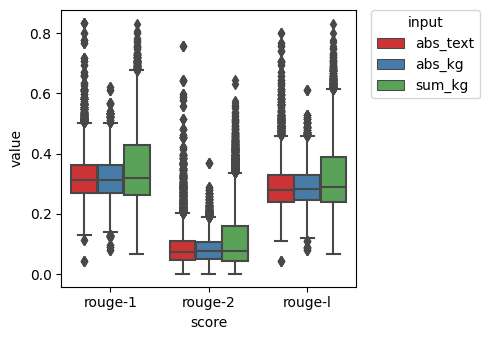

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [5, 3.50]
plt.rcParams["figure.autolayout"] = True

# plt.figure(figsize=(5, 4)) #for a bigger image
sns.boxplot(x="score", y="value", hue="input", data=df_boxplot, palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), title="input", loc='upper left', borderaxespad=0)


In [ ]:
kgSum_sum

In [ ]:
abs_kg_sum

In [ ]:
abs_fulltext_sum

In [ ]:
all_result = pd.copy

In [ ]:
def print_example(summary_df, i):
    print("Reference:")
    print(summary_df.iloc[i]['ref_sum'])
    print("Generation:")
    print(summary_df.iloc[i]['gen_sum'])

In [ ]:
print_example(abs_kg_sum, 1635)


In [ ]:
print_example(abs_fulltext_sum, 1635)


In [ ]:
main_path = str((Path().absolute()).parents[0])
filepath = main_path+"/dataset_MuP/"+RAWDATAFILES['val']
reference_sum = load_data(filepath)
reference_sum

In [ ]:
reference_sum[reference_sum["paper_id"]=="SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96"]["ref_sum"][0]